### Goal: Merge the data sets below into one clean data set that can be used to perform basic exploratory data analysis.

## Data Sets Used

**Fire Inspections (2017)**
Catalogues inspection results for non-residential buildings Why: How long ago an inspection occured may impact the risk of a fire in the near future.
Peoria Fire Department

**OVAP Scores (2017)**
OVAP scores inform the Fire Department to what extent a building might be likely to have a fire incident. The OVAP scores have only been generated since new software was implemented in 2017.
Peoria Fire Department

**Building Characteristics**
Catalogues several characteristics of all buildings, such as year built, square footage, etc. Why: Some building characteristics may impact the risk of a fire in the future. For example, older buildings may contain knob-and-tube electrical wiring, which is less safe than modern electrical wiring.
Peoria County GIS Department / City of Peoria Information Systems Department

_Optional_

**Code Violations**
(Dates?)
Catalogues ordinance violations found when inspecting buildings Why: Code violations may point to issues that could cause a fire, such as exposed electrical wiring.
City of Peoria Community Development Department

### __Names of the datasets that we're working with:__

1. commercial_building_list.csv - commercial buildings in the city with firezone id and firestation (Building Characteristics)
2. inspection_data_2017.csv - fire inspections in 2017, pulled from current Peoria Fire Department tool (Fire Inspections)
3. commercial_with_OVAP_score.csv - commercial buildings that have OVAP scores, pulled from current Peoria Fire Department Tool (OVAPs)



## Step 1

Merge the 3 data sets so that we have one final data set of all commercial buildings with inspection results and OVAP scores for 2017.


In [2]:
## 1. Import all 3 data sets to take a look at their columns

import pandas as pd
from pathlib import Path

## 1.a Set path for data sets

inspections_path = Path('.', 'data', 'inspection_data_2017.csv')
buildings_path = Path('.', 'data', 'commercial_property_list.csv')
OVAP_path = Path('.', 'data', 'commercial_with_OVAP_score.csv')

## 1.b Read in data to variables

inspections = pd.read_csv(inspections_path)
buildings = pd.read_csv(buildings_path)
OVAP = pd.read_csv(OVAP_path)

## 1.c Take a look at how the 3 dataframes display address information, which
## will be the column on which we will eventually join them.

print(buildings.loc[:,'full_address'].head())
print(inspections.loc[:, 'Address1'].head())
print(OVAP.loc[:, 'Address'].head())

OVAP.head()


0           100 WALNUT ST
1         400 SW WATER ST
2             SW WATER ST
3    512 SW WASHINGTON ST
4         542 SW ADAMS ST
Name: full_address, dtype: object
0    4700 N University ST #60
1             100 State ST #A
2              1024 W MAIN ST
3        2607 N University ST
4           100 Alexander AVE
Name: Address1, dtype: object
0      8875 N Knoxville AVE
1          Peoria, IL 61615
2    2200 W War Memorial DR
3                    #DU19A
4          Peoria, IL 61613
Name: Address, dtype: object


,Occupancy Name,Address,NFF GPM,Flow Available,OVAP Score
0,Academy of Okinawan Karate,8875 N Knoxville AVE,0.0,Insufficient,0.00
1,NaN,"Peoria, IL 61615",NaN,NaN,NaN
2,the former Napoli's Pizza,2200 W War Memorial DR,196.0,Sufficient,29.46
3,NaN,#DU19A,NaN,NaN,NaN
4,NaN,"Peoria, IL 61613",NaN,NaN,NaN


In [3]:
## 2. Clean the dataframes - Removing Columns

## 2.a Remove unnecessary columns in buildings dataframe

buildings.drop(['street_number', 'street_directionality', 'street_name', 'street_type', 'owner_middleinitial'], axis=1, inplace=True)
buildings.columns


Index(['feature_ID', 'lower_PIN', 'PIN', 'owner_name', 'owner_address',
       'owner_address2', 'owner_city', 'owner_state', 'full_address', 'city',
       'state', 'zipcode', 'tax_code', 'first_name', 'last_name',
       'firestation', 'firezone'],
      dtype='object')

In [4]:
## 2.b Remove unnecessary columns in OVAP dataframe

OVAP.drop(['NFF GPM', 'Flow Available'], axis=1, inplace=True)
OVAP.columns

Index(['Occupancy Name', 'Address', 'OVAP Score'], dtype='object')

In [5]:
## 2.c Remove unnecessary columns in inspections dataframe - based on Roland's recommendations

inspections.drop(['Subcategory',
       'Email', 'Phone', 'FAX', 'OccupancyNotes', 'MapPage',
       'FireAlarmPanelLoc', 'MasterKeyLoc',
       'BasementPresent', 'Width', 'Length', 'GasLPGShutoffLoc',
       'ElectricalPanelLoc', 'FDConnections', 'SprinklerRoomLoc',
       'OtherLocInfo', 'WaterSupplyInfo', 'ExposureInfo', 'HazMat',
       'BuildingAccess', 'AccessProblems', 'VentilationProblems',
       'TimeNormallyOccupied', 'PrePlanNotes', 'UserOccupancyID',
       'LicenseNumber', 'NumberOfUnits', 'OccupancyLoad', 'UBCode', 'NFPACode',
       'IBCode', 'AssessorParcelNumber', 'NumberMilepost',
       'StreetPrefixDirection', 'StreetOrHighwayName', 'StreetType',
       'StreetSuffix', 'AptOrSuite', 'ISOID', 'Latitude',
       'BuildingNumber', 'Longitude',
       'AssessedValue', 'NationalGrid',
       'UtilityBillingNumber', 'RoofTypeId', 'RoofMaterialId',
       'RoofConstructionId', 'StationID', 'DispatchID',
       'Population DensityID'], axis=1, inplace=True)
inspections.columns

Index(['Name', 'Address1', 'Address2', 'City', 'State', 'Zip', 'OccupancyType',
       'BuildingHeight', 'NumberOfFloors', 'SquareFeet',
       'CriticalInfrastructure', 'YearBuilt', 'NFIRSPropertyUse',
       'ConstructionTypeId'],
      dtype='object')

In [6]:
## 3. Clean the dataframes - Adding columns

## 3.a view the OVAP score data set

OVAP.head()

## For every inspection in The OVAP Score data set, there is row for the address,
## another rows with City, State, ZIP and, if relevant, a third row with Unit information. 
## To clean up the OVAP dataframe, we need to remove City, State, and ZIP. 
## Then, we need to add a column to the row with the inspection and address that will denote the building's unit,
## if it exists.

,Occupancy Name,Address,OVAP Score
0,Academy of Okinawan Karate,8875 N Knoxville AVE,0.00
1,NaN,"Peoria, IL 61615",NaN
2,the former Napoli's Pizza,2200 W War Memorial DR,29.46
3,NaN,#DU19A,NaN
4,NaN,"Peoria, IL 61613",NaN


In [7]:
## 3.b Add a "Unit" column to the OVAP data set and fill it with placeholder values 'NaN'.

OVAP.insert(2, 'Unit', 'NaN')
OVAP.head()

,Occupancy Name,Address,Unit,OVAP Score
0,Academy of Okinawan Karate,8875 N Knoxville AVE,NaN,0.00
1,NaN,"Peoria, IL 61615",NaN,NaN
2,the former Napoli's Pizza,2200 W War Memorial DR,NaN,29.46
3,NaN,#DU19A,NaN,NaN
4,NaN,"Peoria, IL 61613",NaN,NaN


In [8]:
## 4. Clean the dataframes - Consolidate Unit number into proper address row.

## 4.a Write a for loop to move unit information from 'Address' column to previous row's 'Unit' column.

## Find number of rows in OVAP by saving the rows from .shape to a variable OVAP_row_length
OVAP_row_length = OVAP.shape[0]

## Create a copy of the OVAP to work with moving forward
OVAP_test = OVAP

## Go through all rows in OVAP_test
for row in range(0, OVAP_row_length):
    
    ## If row's Occupancy Name is a str, this means it is a row with an inspection - skip this row
    if type(OVAP_test.loc[row, 'Occupancy Name']) == str:
        pass
    
    ## Else, the row is not an inspection row, but a row that contains either 1) city, state and zip
    ## ir 2) unit information. Check to see if '#' is in the Address column of this row - if true, 
    ## this must be a row with a Unit number.
    else:
        if '#' in OVAP_test.loc[row, 'Address']:
            
            ## If true, this is a Unit number and is moved to the previous row's Unit column.
            ## Then, drop this column.
            OVAP_test.loc[row-1, 'Unit'] = OVAP_test.loc[row, 'Address']
            OVAP_test.drop(row, inplace=True)
            
        ## Else, this is City, State, and ZIP and is not needed, so it is dropped.    
        else:
            OVAP_test.drop(row, inplace=True)
            
## See the resulting dataframe        
OVAP_test.head(20)


,Occupancy Name,Address,Unit,OVAP Score
0,Academy of Okinawan Karate,8875 N Knoxville AVE,NaN,0.00
2,the former Napoli's Pizza,2200 W War Memorial DR,#DU19A,29.46
5,(Office w/ Unkown name),701 Main ST,#7,29.46
8,(vacant mercantile),2200 W War Memorial DR,#DU08,21.02
11,1505 on the Avenue Apartments,1505 N Peoria AVE,NaN,39.11
13,311 SW Water,311 SW Water ST,NaN,33.00
15,401 Management Office,401 SW Water ST,#201,31.53
18,401 Water - CAFE 401,401 SW Water ST,#102,30.31
22,401 Water - Hodges Loizzi Eisenhammer,401 SW Water ST,#106,30.55
25,401 Water - VOLT,401 SW Water ST,#101,27.13


In [10]:
OVAP_test.drop(['Address', 'Unit'], axis=1, inplace=True)OVAP_test

ValueError: labels ['Address' 'Unit'] not contained in axis

In [13]:
OVAP_test.columns = ['Name', 'OVAP Score']
OVAP_test

,Name,OVAP Score
0,Academy of Okinawan Karate,0.00
2,the former Napoli's Pizza,29.46
5,(Office w/ Unkown name),29.46
8,(vacant mercantile),21.02
11,1505 on the Avenue Apartments,39.11
13,311 SW Water,33.00
15,401 Management Office,31.53
18,401 Water - CAFE 401,30.31
22,401 Water - Hodges Loizzi Eisenhammer,30.55
25,401 Water - VOLT,27.13


In [8]:
## Collapse multiple units into single address and assign the maximum value of same addresses to single address.
## In the future, we could add additional features to this collapsing. OVAP score is an aggregate of all these features.

simplified_OVAP = OVAP_test.groupby('Address')[['OVAP Score']].max()
simplified_OVAP = simplified_OVAP.reset_index()

## Check to see if all War Memorial mall rows are collapsed.

simplified_OVAP.loc[(simplified_OVAP.loc[:, 'Address'] == '2200 W War Memorial DR'), :]

,Address,OVAP Score
211,2200 W War Memorial DR,39.6


In [41]:
## 5. Prepare to join dataframes.

## 5.a Capitalize all addresses in inspections and OVAP_test dataframe to prepare for joining with buildings

## OVAP_test capitalization
simplified_OVAP['Address'] = simplified_OVAP['Address'].str.upper()
print(simplified_OVAP.head(50))

## Drop OVAP Scores of 0
new_simplified_OVAP = simplified_OVAP.loc[(simplified_OVAP.loc[:, 'OVAP Score'] != 0.00), :]
print(simplified_OVAP.head(50))

## inspections capitalization (IGNORE)
inspections['Address1'] = inspections['Address1'].str.upper()
print(inspections.head())

                   Address  OVAP Score
0               1 ALOHA LN       28.60
1                1 ELKS DR       31.41
2        100 ALEXANDER AVE       32.51
3             100 STATE ST       28.60
4        1000 W ALBANY AVE       36.67
5           1000 W MAIN ST       35.57
6    1005 NE JEFFERSON AVE       26.00
7           1006 W MAIN ST       33.73
8       1009 N SHERIDAN RD       26.33
9        1010 W JOHNSON ST        0.00
10          1010 W MAIN ST       33.73
11         1013 W LAKE AVE       27.13
12          1014 W MAIN ST       35.57
13          1016 W MAIN ST       35.20
14         1017 W LAKE AVE       23.83
15          1017 W MAIN ST       28.97
16         1019 W LAKE AVE       30.68
17   1020 SW JEFFERSON AVE        0.00
18          1020 W MAIN ST       33.00
19     1021 N SHERIDAN AVE       26.28
20      1021 N SHERIDAN ST       29.33
21      1022 N SHERIDAN ST       33.73
22          1024 W MAIN ST       37.03
23        1028 SW ADAMS ST       24.78
24    1029 N UNIVERSITY S

In [17]:
## 6. Prepare to join dataframes.

## 6.a Rename buildings' and inspections' address columns to 'Address'

buildings.rename(columns={'full_address':'Address'}, inplace=True)
## inspections.rename(columns={'Address1':'Address'}, inplace=True)
buildings.head()

,feature_ID,lower_PIN,PIN,owner_name,owner_address,owner_address2,owner_city,owner_state,Address,city,state,zipcode,tax_code,first_name,last_name,firestation,firezone
0,588,1809403005,1809403005,MURRAY PLACE DEVELOPMENT LLC,100 WALNUT ST SUITE 100,,PEORIA,IL,100 WALNUT ST,PEORIA,IL,61602,44,,MURRAY PLACE DEVELOPMENT LLC,1,101
1,589,1809410007,1809410007,IRON FRONT LLC,PO BOX 5605,,PEORIA,IL,400 SW WATER ST,PEORIA,IL,61602,44,,IRON FRONT LLC,1,101
2,590,1809410011,1809410011,AMEREN ILLINOIS COMPANY,P O BOX 66149 MC 210,,SAINT LOUIS,MO,SW WATER ST,PEORIA,IL,61602,44,,AMEREN ILLINOIS COMPANY,1,101
3,592,1809403002,1809403002,MPD PARTNERS LLC,100 WALNUT ST SUITE 100,,PEORIA,IL,512 SW WASHINGTON ST,PEORIA,IL,61602,44,,MPD PARTNERS LLC,1,101
4,1296,1809333001,1809333001,CITY OF PEORIA,419 FULTON ST,,PEORIA,IL,542 SW ADAMS ST,PEORIA,IL,61602,44,,CITY OF PEORIA,1,101


In [18]:
## 7. Join simpified_OVAP and buildings dataframes by the Address column

## 7.2 Join buildings and simplified_OVAP dataframes on shared 'Address' column

buildings_with_OVAP = pd.merge(buildings, simplified_OVAP)
buildings_with_OVAP.head()

six_hours = pd.merge(OVAP_test, inspections)

## 7.3 Join buildings_with_OVAP and inspections on shared 'Address' column
## joined_data = pd.merge(buildings_with_OVAP, inspections)

## AS FAR AS WE GOT
## !!Resulting joined_data need to be cleaned!!
##print(joined_data.shape)
##joined_data

,feature_ID,lower_PIN,PIN,owner_name,owner_address,owner_address2,owner_city,owner_state,Address,city,state,zipcode,tax_code,first_name,last_name,firestation,firezone,OVAP Score
0,1974,1809410005,1809410005,RIVERFRONT VILLAGE DEVELOPERS LLC,C/O WISDOM DEVELOPMENT GROUP INC,405 SW COMMERCIAL ST,PEORIA,IL,418 SW WATER ST,PEORIA,IL,61602,44,,RIVERFRONT VILLAGE DEVELOPERS LLC,1,101,25.30
1,1975,1809406008,1809406008,IRON FRONT LLC,C/O KERMIT A HUBER,P O BOX 5605,PEORIA,IL,401 SW WATER ST,PEORIA,IL,61602,27,,IRON FRONT LLC,1,101,31.53
2,1307,1809202016,1809202016,DOC PROPERTY LLC,P O BOX 5605,,PEORIA,IL,607 MAIN ST,PEORIA,IL,61602,46,,DOC PROPERTY LLC,1,102,32.27
3,1914,1809202009,1809202009,PEORIA MAIN STREET LLC,P O BOX 56,,PEORIA,IL,627 MAIN ST,PEORIA,IL,61602,46,,PEORIA MAIN STREET LLC,1,102,31.29
4,1943,1809206015,1809206015,PERE MARQUETTE HOTEL LLC,450 N MAIN ST,,EAST PEORIA,IL,501 MAIN ST,PEORIA,IL,61602,46,,PERE MARQUETTE HOTEL LLC,1,102,48.00


In [19]:
## Tried an alternative approach of merging the inspection data and OVAP score data. While we have the right amount of
## columns, we've greatly inflated the number of rows in our data. Something is going wrong here...

six_hours = pd.merge(OVAP_test, inspections, on='Name')
print(OVAP_test.shape)
print(inspections.shape)
print(six_hours.shape)

(1061, 2)
(2070, 14)
(6444, 15)


In [19]:
## Describe the statistics of OVAP scores by firestation.

buildings_with_OVAP.groupby('firestation')[['OVAP Score']].describe()

OVAP Score                                                         \
                 count       mean        std    min      25%     50%      75%   
firestation                                                                     
1                 42.0  32.092619   6.278151  19.43  29.4900  31.780  34.0400   
10                28.0  30.882500   4.342739  22.86  26.2175  31.715  34.1000   
11                47.0  28.143830  10.581933   0.00  26.8850  30.800  34.1000   
12                 7.0  27.692857  12.474706   0.00  29.7000  32.510  32.8800   
13                36.0  30.885278   8.859204   0.00  28.7800  30.800  36.0900   
15                43.0  26.091628  13.300593   0.00  25.1750  30.680  35.3850   
16                12.0  21.329167  16.074136   0.00   0.0000  29.580  33.8600   
19                29.0  28.248966   6.646698   0.00  26.4000  28.600  31.9000   
2                 19.0  21.615789  11.952237   0.00  22.7950  24.780  29.7000   
20                14.0  19.987857  18.366573   0.00   0.0000  29.575  35.3075   
3                 21.0  33.337143   3.224257  26.15  31.4100  33.000  35.5700   
4                 24.0  30.616250   8.754204   0.00  26.5500  32.450  35.4150   

                    
               max  
firestation         
1            49.00  
10           37.40  
11           42.47  
12           36.18  
13           40.70  
15           39.60  
16           38.50  
19           36.91  
2            33.33  
20           45.10  
3            39.60  
4            42.90

In [20]:
## Box and Whisker Plot of Ovap Scores by Firestation


In [22]:
## General Statistics on OVAP Scores

buildings_with_OVAP['OVAP Score'].describe()

count    322.000000
mean      28.458354
std       10.544540
min        0.000000
25%       26.400000
50%       31.170000
75%       34.100000
max       49.000000
Name: OVAP Score, dtype: float64

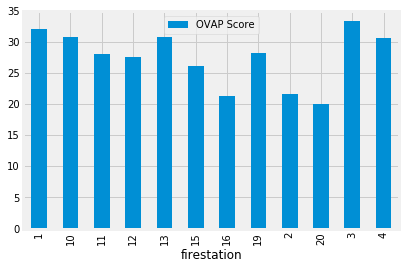

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline


## Plot bar graph
buildings_with_OVAP.groupby('firestation')[['OVAP Score']].mean().plot(kind='bar')

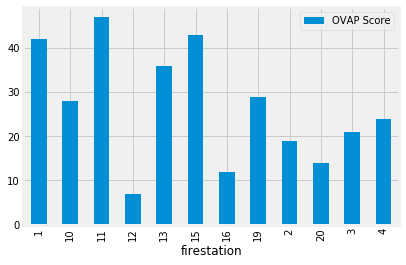

In [30]:
## Plot bar of OVAP Score frequency
buildings_with_OVAP.groupby('firestation')[['OVAP Score']].count().plot(kind='bar')

In [40]:
## Plot bar of OVAP Score frequency
## buildings_with_OVAP.groupby('firestation')[['Address']].plot(kind='bar')

TypeError: Empty 'DataFrame': no numeric data to plot